<a href="https://colab.research.google.com/github/eireford/ConwayLifeTensorFlow/blob/master/LTF_logistic_regression_2_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Life on TensorFlow
A hueristic implementation of the Game of Life algorythm to create a dataset to train a model that mimics the Life algorythm.
The convolutional network is able to learn a single step of the game of life rules from fewer then 40 examples. 

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras import models
from tensorflow.keras import layers

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
    '\n\nThis error most likely means that this notebook is not '
    'configured to use a GPU.  Change this in Notebook Settings via the '
    'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')
print(f"Found GPU at: {device_name}")

TensorFlow 2.x selected.
Found GPU at: /device:GPU:0


In [0]:
FEATURES_SHAPE = [1024,1024,1]
LABELS_SHAPE = [1024,1024,1]
SET_SIZE = 40

def random_uniform_grid(shape=FEATURES_SHAPE):
  return tf.round(tf.random.uniform(shape=shape,dtype=tf.float32))

In [0]:
def convolve_for_density_map(X):
  life_density_kernal = tf.constant([[[[1]],[[1]],[[1]]],
                                   [[[1]],[[10]],[[1]]],
                                   [[[1]],[[1]],[[1]]]],dtype=tf.float32)
  X_reshaped = tf.reshape(X,[1,X.shape[0],X.shape[1],1])
  density_map = tf.nn.conv2d(X_reshaped,life_density_kernal,[1,1,1,1],"SAME")
  density_map = tf.reshape(density_map,X.shape)
  return tf.round(density_map)

def will_be_alive(density_map):
  is_three = tf.equal(density_map,3.0)
  is_twelve = tf.equal(density_map,12.0)
  is_thirteen = tf.equal(density_map,13.0)
  any_true = is_three | is_twelve | is_thirteen
  return tf.cast(any_true,dtype=tf.float32)

def step(X):
  density_map = convolve_for_density_map(X)
  #print(density_map)
  return will_be_alive(density_map)

In [0]:
def get_data_examples(size = SET_SIZE):
  for i in range(size):
    X = random_uniform_grid()
    Y1 = step(X)
    Y2 = step(Y1)
    yield X,Y2

def get_dataset():
  return tf.data.Dataset.from_generator(get_data_examples,(tf.float32,tf.float32),(tf.TensorShape(FEATURES_SHAPE),tf.TensorShape(LABELS_SHAPE)))
  
X_COMMON = get_dataset()

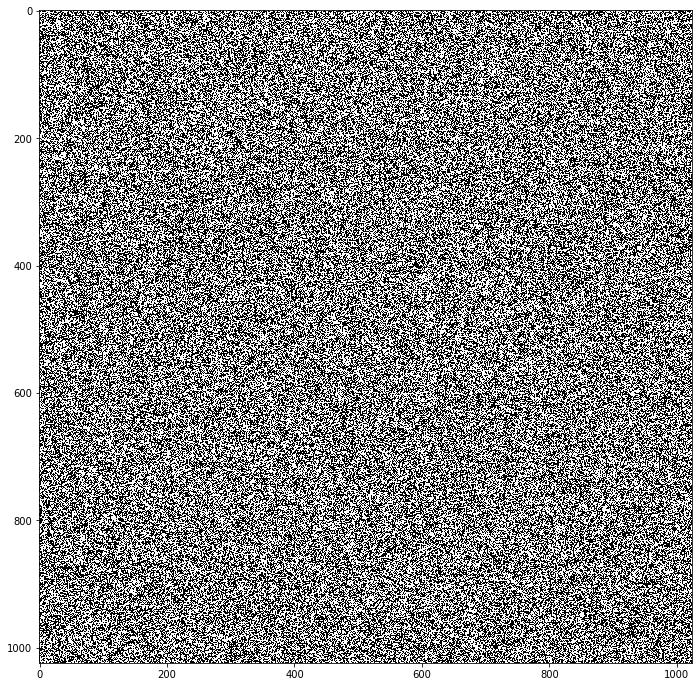

In [5]:
for element in X_COMMON: 
  e = element
  break
plt.gcf().set_size_inches(12,12)
figure_1 = plt.imshow(tf.squeeze(e[0]),cmap='Greys',origin='upper',interpolation='nearest')

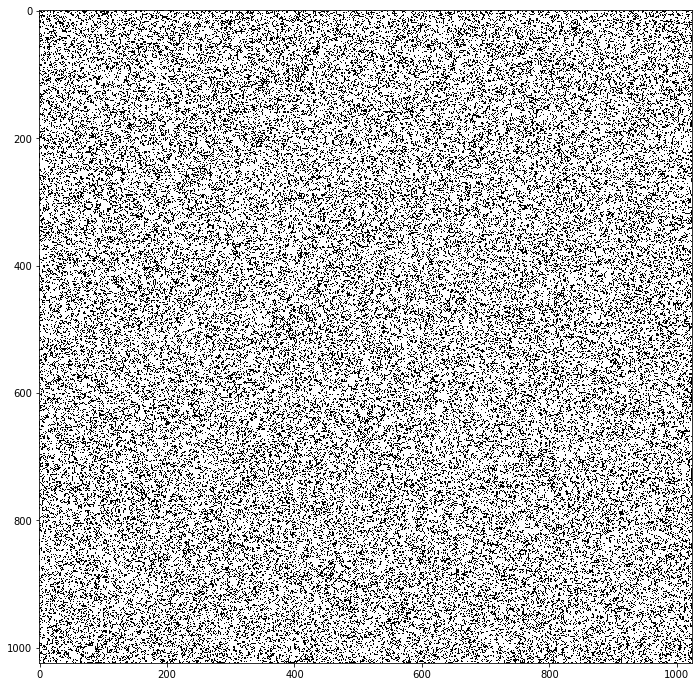

In [6]:
plt.gcf().set_size_inches(12,12)
figure_1 = plt.imshow(tf.squeeze(e[1]),cmap='Greys',origin='upper',interpolation='nearest')

In [0]:
model1 = models.Sequential()
model1.add(layers.Conv2D(16, (5, 5), padding='same',activation='relu', input_shape=FEATURES_SHAPE))
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.Dense(1))
model1.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='mse',
              metrics=['accuracy'])

In [8]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1024, 1024, 16)    416       
_________________________________________________________________
dense (Dense)                (None, 1024, 1024, 128)   2176      
_________________________________________________________________
dense_1 (Dense)              (None, 1024, 1024, 1)     129       
Total params: 2,721
Trainable params: 2,721
Non-trainable params: 0
_________________________________________________________________


In [9]:
X_COMMON1 = X_COMMON.batch(2)
%time model1.fit(X_COMMON1,epochs=10)

Epoch 1/10
20/20 [==============================] - 2s 122ms/step - loss: 0.1921 - accuracy: 0.7453
Epoch 2/10
20/20 [==============================] - 2s 97ms/step - loss: 0.1776 - accuracy: 0.7377
Epoch 3/10
20/20 [==============================] - 2s 97ms/step - loss: 0.1701 - accuracy: 0.7426
Epoch 4/10
20/20 [==============================] - 2s 97ms/step - loss: 0.1648 - accuracy: 0.7452
Epoch 5/10
20/20 [==============================] - 2s 98ms/step - loss: 0.1593 - accuracy: 0.7556
Epoch 6/10
20/20 [==============================] - 2s 97ms/step - loss: 0.1560 - accuracy: 0.7679
Epoch 7/10
20/20 [==============================] - 2s 97ms/step - loss: 0.1538 - accuracy: 0.7731
Epoch 8/10
20/20 [==============================] - 2s 97ms/step - loss: 0.1527 - accuracy: 0.7747
Epoch 9/10
20/20 [==============================] - 2s 97ms/step - loss: 0.1502 - accuracy: 0.7788
Epoch 10/10
20/20 [==============================] - 2s 97ms/step - loss: 0.1489 - accuracy: 0.7802
CPU time

In [0]:
testset = get_dataset()

In [11]:
testset1 = testset.batch(10)
model1.evaluate(testset1)

      4/Unknown - 2s 416ms/step - loss: 0.1480 - accuracy: 0.7824

[0.14802458509802818, 0.7823812]

In [0]:
model2 = models.Sequential()
model2.add(layers.Conv2D(16, (5, 5), padding='same',activation='relu', input_shape=FEATURES_SHAPE))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(1))
model2.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='mse',
              metrics=['accuracy'])

In [13]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1024, 1024, 16)    416       
_________________________________________________________________
dense_2 (Dense)              (None, 1024, 1024, 128)   2176      
_________________________________________________________________
dense_3 (Dense)              (None, 1024, 1024, 1)     129       
Total params: 2,721
Trainable params: 2,721
Non-trainable params: 0
_________________________________________________________________


In [14]:
X_COMMON2 = X_COMMON.batch(2)
%time model2.fit(X_COMMON2,epochs=10)

Epoch 1/10
20/20 [==============================] - 2s 114ms/step - loss: 0.1958 - accuracy: 0.7413
Epoch 2/10
20/20 [==============================] - 2s 98ms/step - loss: 0.1846 - accuracy: 0.7449
Epoch 3/10
20/20 [==============================] - 2s 98ms/step - loss: 0.1797 - accuracy: 0.7417
Epoch 4/10
20/20 [==============================] - 2s 98ms/step - loss: 0.1738 - accuracy: 0.7412
Epoch 5/10
20/20 [==============================] - 2s 98ms/step - loss: 0.1648 - accuracy: 0.7464
Epoch 6/10
20/20 [==============================] - 2s 98ms/step - loss: 0.1573 - accuracy: 0.7567
Epoch 7/10
20/20 [==============================] - 2s 97ms/step - loss: 0.1529 - accuracy: 0.7706
Epoch 8/10
20/20 [==============================] - 2s 97ms/step - loss: 0.1498 - accuracy: 0.7767
Epoch 9/10
20/20 [==============================] - 2s 98ms/step - loss: 0.1477 - accuracy: 0.7799
Epoch 10/10
20/20 [==============================] - 2s 98ms/step - loss: 0.1457 - accuracy: 0.7830
CPU time

In [15]:
testset2 = testset.batch(10)
model2.evaluate(testset2)

      4/Unknown - 1s 283ms/step - loss: 0.1448 - accuracy: 0.7827

[0.14478713646531105, 0.78266937]

In [0]:
model3 = models.Sequential()
model3.add(layers.Conv2D(16, (3, 3), padding='same',activation='relu', input_shape=FEATURES_SHAPE))
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dense(1))
model3.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='mse',
              metrics=['accuracy'])

In [17]:
X_COMMON3 = X_COMMON.batch(2)
%time model3.fit(X_COMMON3,epochs=10)

Epoch 1/10
20/20 [==============================] - 2s 116ms/step - loss: 0.1892 - accuracy: 0.7415
Epoch 2/10
20/20 [==============================] - 2s 98ms/step - loss: 0.1748 - accuracy: 0.7401
Epoch 3/10
20/20 [==============================] - 2s 97ms/step - loss: 0.1713 - accuracy: 0.7438
Epoch 4/10
20/20 [==============================] - 2s 97ms/step - loss: 0.1680 - accuracy: 0.7470
Epoch 5/10
20/20 [==============================] - 2s 96ms/step - loss: 0.1659 - accuracy: 0.7479
Epoch 6/10
20/20 [==============================] - 2s 96ms/step - loss: 0.1652 - accuracy: 0.7480
Epoch 7/10
20/20 [==============================] - 2s 97ms/step - loss: 0.1650 - accuracy: 0.7484
Epoch 8/10
20/20 [==============================] - 2s 97ms/step - loss: 0.1649 - accuracy: 0.7484
Epoch 9/10
20/20 [==============================] - 2s 97ms/step - loss: 0.1648 - accuracy: 0.7484
Epoch 10/10
20/20 [==============================] - 2s 97ms/step - loss: 0.1648 - accuracy: 0.7484
CPU time

In [18]:
testset3 = testset.batch(10)
model3.evaluate(testset3)

      4/Unknown - 1s 305ms/step - loss: 0.1645 - accuracy: 0.7488

[0.16450029239058495, 0.7487873]